In [1]:
import periodictable as per
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T1 = 1811484.838 #K, for 0.05 M_{Sun}
T2 = 2875552.937 #K, for 0.1 M_{Sun}
T3 = 34854832.59 #K, for M_{ch}
T4 = 61951910.61 #K, for 10 M_{Sun}

def contract1(x):
    return (1/3)*x+np.log10(T1/1e7)
def contract2(x):
    return (1/3)*x+np.log10(T2/1e7)
def contract3(x):
    return (1/3)*x+np.log10(T3/1e7)
def contract4(x):
    return (1/3)*x+np.log10(T4/1e7)
def contractmin(x):
    return (1/3)*x+(1/2)*np.log10(0.123)

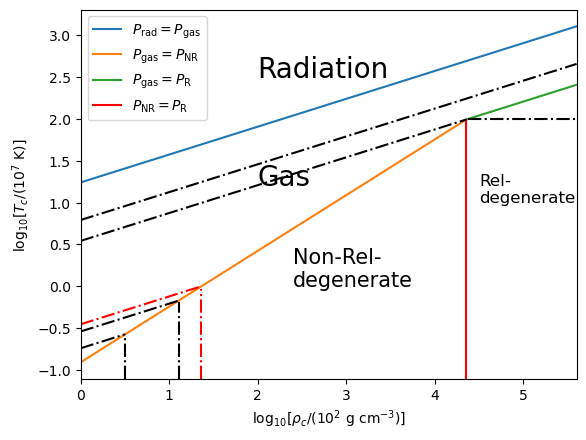

In [3]:
rho = np.linspace(1,4e5,5000)
rho_NR = np.linspace(1, 2.27e4, 5000)
rho_ER = np.linspace(2.27e4, 4e5, 5000)
rho_T1 = np.linspace(1, 10**(0.5043887757967992), 5000)
rho_T2 = np.linspace(1, 10**(1.1064487669137832), 5000)
rho_T3 = np.linspace(1, 10**(4.357073669081526), 5000)
rho_min = np.linspace(1, 10**(-(3/2)*np.log10(0.123)), 5000)

def Boundary1(x): #gas-rad
    return 17.448*x**(1/3)
def Boundary2(x): #gas-NR
    return 0.123*x**(2/3)
def Boundary5(x): #gas-ER
    return 3.487*x**(1/3)

plt.plot(np.log10(rho), np.log10(Boundary1(rho)), label=r'$P_{\rm rad}=P_{\rm gas}$')
plt.plot(np.log10(rho_NR), np.log10(Boundary2(rho_NR)), label=r'$P_{\rm gas}=P_{\rm NR}$')
plt.plot(np.log10(rho_ER), np.log10(Boundary5(rho_ER)), label=r'$P_{\rm gas}=P_{\rm R}$')

plt.xlim(min(np.log10(rho)), max(np.log10(rho)))
#plt.ylim(min(np.log10(Boundary5(rho))), max(np.log10(Boundary1(rho))))
#plt.ylim(0,max(np.log10(Boundary1(rho))))

#plt.axvline(x=np.log10(2.27e4), ymin=min(np.log10(Boundary5(rho))), ymax=np.log10(Boundary5(2.27e4))/max(np.log10(Boundary1(rho))), color='red',linestyle='--', label=r'$P_{\rm NR}=P_{\rm R}$')
plt.axvline(x=np.log10(2.27e4), ymax=0.7, color='red', label=r'$P_{\rm NR}=P_{\rm R}$')
#plt.axhline(y=np.log10(Boundary5(2.27e4)))
plt.legend()
plt.xlabel(r'$\mathrm{log_{10}}[\rho_{c}/(10^{2}\ \mathrm{g\ cm^{-3}})]$')
plt.ylabel(r'$\mathrm{log_{10}}[T_c/(10^7\ \mathrm{K})]$')
plt.text(2.0, 2.5, 'Radiation', fontsize=20)
plt.text(2.0, 1.2, 'Gas', fontsize=20)
plt.text(2.4, 0.0, 'Non-Rel-\ndegenerate', fontsize=15)
plt.text(4.5, 1.0, 'Rel-\ndegenerate', fontsize=12)
#plt.savefig('/Users/zengyuhe/academic_doc/HWs/stellar/figures/Stellar_HW9_T2a_log10.pdf')
plt.plot(np.log10(rho_T1), contract1(np.log10(rho_T1)), linestyle='-.', color='black')
plt.plot(np.log10(rho_T2), contract2(np.log10(rho_T2)), linestyle='-.', color='black')
plt.plot(np.log10(rho_T3), contract3(np.log10(rho_T3)), linestyle='-.', color='black')
plt.plot(np.log10(rho), contract4(np.log10(rho)), linestyle='-.', color='black')
plt.plot(np.log10(rho_min), contractmin(np.log10(rho_min)), linestyle='-.', color='red')
#plt.axhline(y=0)

plt.axvline(x=0.5043887757967992, ymax=0.12, linestyle='-.', color='black')
plt.axvline(x=1.1064487669137832, ymax=0.21, linestyle='-.', color='black')
plt.axhline(y=contract3(4.357073669081526), xmin=0.78, linestyle='-.', color='black')
plt.axvline(x=-(3/2)*np.log10(0.123), ymax=0.245, linestyle='-.', color='red')

#plt.savefig('/Users/zengyuhe/academic_doc/HWs/stellar/figures/Stellar_HW9_T2b_log10.pdf')
plt.show()

In [4]:
np.log10(Boundary5(2.27e4))

1.9944605664403507

In [5]:
np.max(np.log10(Boundary1(rho)))

3.109098983013298

In [6]:
print(per.Be[8].mass-2*per.He[4].mass, per.Be[8].mass, per.He[4].mass)

9.859060000039221e-05 8.00530509 4.0026032497


In [7]:
def pp_func1(x):
    return np.exp(-x)
def pp_func2(x):
    return np.exp(-23.931/x**(1/2))
def pp_func3(x):
    return pp_func1(x)*pp_func2(x)

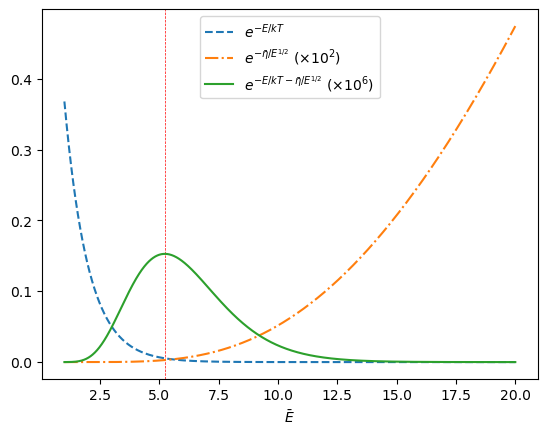

In [8]:
E_bar=np.linspace(1,20,2000)
plt.axvline(x = 5.23, color = 'red', linestyle='--', linewidth=0.5)
plt.plot(E_bar, pp_func1(E_bar), label = r'$e^{-E/kT}$', linestyle='--')
plt.plot(E_bar, pp_func2(E_bar)*(1e2), label = r'$e^{-\bar{\eta}/E^{1/2}}\ (\times 10^{2})$',linestyle='-.')
plt.plot(E_bar, pp_func3(E_bar)*(1e6), label = r'$e^{-E/kT-\bar{\eta}/E^{1/2}}\ (\times 10^{6})$')
plt.xlabel(r'$\bar{E}$')
plt.legend()
#plt.ylabel(r'$10^{9}\times e^{-E/kT-\bar{\eta}/E^{1/2}}$')
#plt.savefig('/Users/zengyuhe/academic_doc/HWs/Stellar_HW7a.jpg')
plt.show()

In [9]:
def pp_func4(x):
    return pp_func3(x)*x

In [10]:
from scipy.integrate import quad

In [11]:
nu = -(3/2)+quad(pp_func4, 0, np.inf)[0]/quad(pp_func3, 0, np.inf)[0]
print(nu)

4.573085486185747


In [12]:
def pp_func5(x):
    return np.exp(-x)*np.exp(-190.856/x**(1/2))

In [13]:
ratio = (per.H.mass/per.He.mass)**(1/2)*(quad(pp_func5, 0, np.inf)[0]/quad(pp_func3, 0, np.inf)[0])
print(ratio)

2.375005980204964e-21


In [14]:
print((per.H.mass/per.He.mass)**(1/2))

0.5018178856076172


In [15]:
print(quad(pp_func5, 0, np.inf)[1]/quad(pp_func3, 0, np.inf)[1])

8.13060501007213e-17


In [16]:
print(quad(pp_func5, 0, np.inf))

(3.473003333731621e-27, 6.093487095318008e-27)


In [17]:
e_mass = 0.00054858
2*per.H[1].mass+per.He[4].mass-2*per.He[3].mass

-0.013805305500000031

In [18]:
per.H[2].mass+e_mass-2*per.H.mass

-0.0012296420000001973

In [19]:
per.He.mass-4*per.H.mass

-0.029157999999999795

In [20]:
def func_test1(x):
    return np.exp(-x-23.391/np.sqrt(x))
def func_test2(x):
    return np.exp(-x-190.856/np.sqrt(x))
print(quad(func_test2,0,np.inf)[0]/quad(func_test1,0,np.inf)[0])

3.761256555581814e-21


In [21]:
x13 = (1/2)*np.arcsin(np.sqrt(0.1))
x23 = (1/2)*np.arcsin(np.sqrt(0.97))
x12 = (1/2)*np.arcsin(np.sqrt(0.86))

In [22]:
from numpy import sin, cos

In [23]:
Ae = cos(x13)**4*(cos(x12)**4+sin(x12)**4)+sin(x13)**4
Be = 2*sin(x12)**2*cos(x12)**2*cos(x13)**4
Ce = 2*cos(x12)**2*cos(x13)**2*sin(x13)**2
De = 2*sin(x13)**2*cos(x13)**2*sin(x12)**2

Amu = 2*cos(x13)**2*sin(x12)**2*cos(x12)**2*cos(x23)**2+cos(x13)**2*sin(x23)**2*sin(x13)**2\
+cos(x13)**2*sin(x13)**2*sin(x23)**2*(sin(x12)**4+cos(x12)**4)\
    +2*cos(x13)**2*cos(x12)*sin(x12)*sin(x13)*sin(x23)*cos(x23)*(cos(x12)**2-sin(x12)**2)
Bmu = -2*cos(x12)*sin(x12)*cos(x13)**2*(sin(x12)*cos(x12)*cos(x23)**2-sin(x12)**2*sin(x13)*sin(x23)*cos(x23)\
                                        +cos(x12)**2*sin(x13)*sin(x23)*cos(x23)-sin(x13)**2*sin(x12)*cos(x12)*sin(x23)**2)
Cmu = -2*cos(x13)**2*cos(x12)*sin(x23)*sin(x13)*(cos(x23)*sin(x12)+cos(x12)*sin(x13)*sin(x23))
Dmu = 2*cos(x13)**2*sin(x12)*sin(x23)*sin(x13)*(cos(x12)*cos(x23)-sin(x12)*sin(x13)*sin(x23))

Atau = 2*sin(x12)**2*cos(x12)**2*cos(x13)**2*sin(x23)**2+cos(x13)**2*cos(x23)**2*sin(x13)**2\
+cos(x13)**2*sin(x13)**2*cos(x23)**2*(cos(x12)**4+sin(x12)**4)\
+2*cos(x13)**2*sin(x12)*cos(x12)*sin(x13)*sin(x23)*cos(x23)*(sin(x12)**2-cos(x12)**2)
Btau = -2*cos(x12)*sin(x12)*cos(x13)**2*(sin(x12)*cos(x12)*sin(x23)**2-cos(x12)**2*sin(x13)*sin(x23)*cos(x23)\
                                         +sin(x12)**2*sin(x13)*sin(x23)*cos(x23)-sin(x13)**2*sin(x12)*cos(x12)*cos(x23)**2)
Ctau = -2*cos(x12)*cos(x13)**2*cos(x23)*sin(x13)*(cos(x12)*cos(x23)*sin(x13)-sin(x12)*sin(x23))
Dtau = -2*cos(x13)**2*sin(x12)*sin(x13)*cos(x23)*(cos(x23)*sin(x12)*sin(x13)+cos(x12)*sin(x23))

In [24]:
def Pe(l):
    return Ae+Be*cos(0.35*l)+Ce*cos(10*l)+De*cos(10*l)
def Pmu(l):
    return Amu+Bmu*cos(0.35*l)+Cmu*cos(10*l)+Dmu*cos(10*l)
def Ptau(l):
    return Atau+Btau*cos(0.35*l)+Ctau*cos(10*l)+Dtau*cos(10*l)

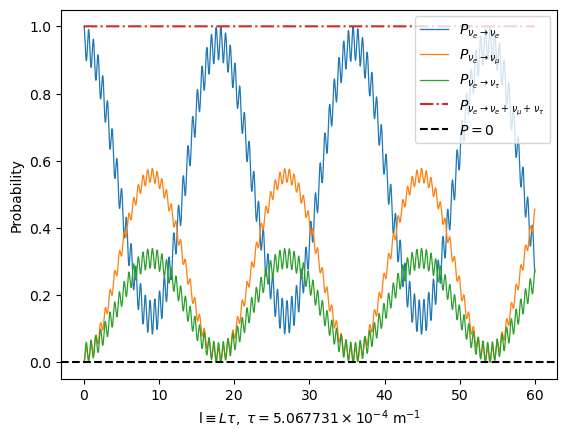

In [25]:
l = np.linspace(0, 60, 10000)
plt.plot(l, Pe(l), linewidth = 0.9, label = r'$P_{\nu_{e}\rightarrow \nu_{e}}$')
plt.plot(l, Pmu(l), linewidth = 0.9, label = r'$P_{\nu_{e}\rightarrow \nu_{\mu}}$')
plt.plot(l, Ptau(l), linewidth = 0.9, label = r'$P_{\nu_{e}\rightarrow \nu_{\tau}}$')
plt.plot(l, Pe(l)+Pmu(l)+Ptau(l), linestyle = '-.', label = r'$P_{\nu_{e}\rightarrow \nu_{e}+\nu_{\mu}+\nu_{\tau}}$')
plt.axhline(y = 0.0, color = 'black', linestyle = '--', label = r'$P=0$')
plt.xlabel(r'l$\equiv L\tau,\ \tau= 5.067731\times 10^{-4}\ \mathrm{m}^{-1}$')
plt.ylabel('Probability')
plt.legend(loc='upper right')
#plt.savefig('/Users/zengyuhe/academic_doc/HWs/stellar/figures/3_neutrinos.pdf')
plt.show()